In [277]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [278]:
train_dir_path = './images/train'
test_dir_path = './images/test'
train_images_path = []
train_labels = []
test_images_path = []
test_labels = []

In [279]:
for image_filename in os.listdir(train_dir_path): 
    if '-' in image_filename: 
        image_path = os.path.join(train_dir_path, image_filename) 
        train_images_path.append(image_path)
        label = image_filename.split('-')[0]
        train_labels.append(label)
        
for image_filename in os.listdir(test_dir_path): 
    if '-' in image_filename:
        image_path = os.path.join(test_dir_path, image_filename) 
        test_images_path.append(image_path)
        label = image_filename.split('-')[0]
        test_labels.append(label)

In [280]:
train_labels = [label.replace('chunhat', 'hình chữ nhật').replace('tron', 'hình tròn').replace('tamgiac', 'hình tam giác') for label in train_labels]
test_labels = [label.replace('chunhat', 'hình chữ nhật').replace('tron', 'hình tròn').replace('tamgiac', 'hình tam giác') for label in test_labels]
print(train_labels)
print(test_labels)

['hình chữ nhật', 'hình chữ nhật', 'hình chữ nhật', 'hình chữ nhật', 'hình chữ nhật', 'hình chữ nhật', 'hình tam giác', 'hình tam giác', 'hình tam giác', 'hình tam giác', 'hình tam giác', 'hình tròn', 'hình tròn', 'hình tròn', 'hình tròn', 'hình tròn']
['hình chữ nhật', 'hình chữ nhật', 'hình chữ nhật', 'hình chữ nhật', 'hình chữ nhật', 'hình tam giác', 'hình tam giác', 'hình tam giác', 'hình tròn', 'hình tròn', 'hình tròn']


In [281]:
def compute_sobel_features(image_path):
    sobel_features = []
    for i in image_path:
        img_gray = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img_gray, (64, 64))

        smoothed_image = cv2.GaussianBlur(img_resized, (5, 5), 0)

        sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=5)
        sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=5)
        gradient_mag = np.sqrt(sobel_x**2 + sobel_y**2)
        sobel_features.append(gradient_mag.flatten())
    return sobel_features

train_sobel_features = compute_sobel_features(train_images_path)
test_sobel_features = compute_sobel_features(test_images_path)

scaler = StandardScaler()
train_sobel_features = scaler.fit_transform(train_sobel_features)
test_sobel_features = scaler.transform(test_sobel_features)


In [282]:
model = SVC(kernel='linear')
model.fit(train_sobel_features,train_labels)

SVC(kernel='linear')

In [283]:
pred = model.predict(test_sobel_features)
print("Sobel Feature Accuracy: ", accuracy_score(test_labels, pred))

Sobel Feature Accuracy:  0.8181818181818182


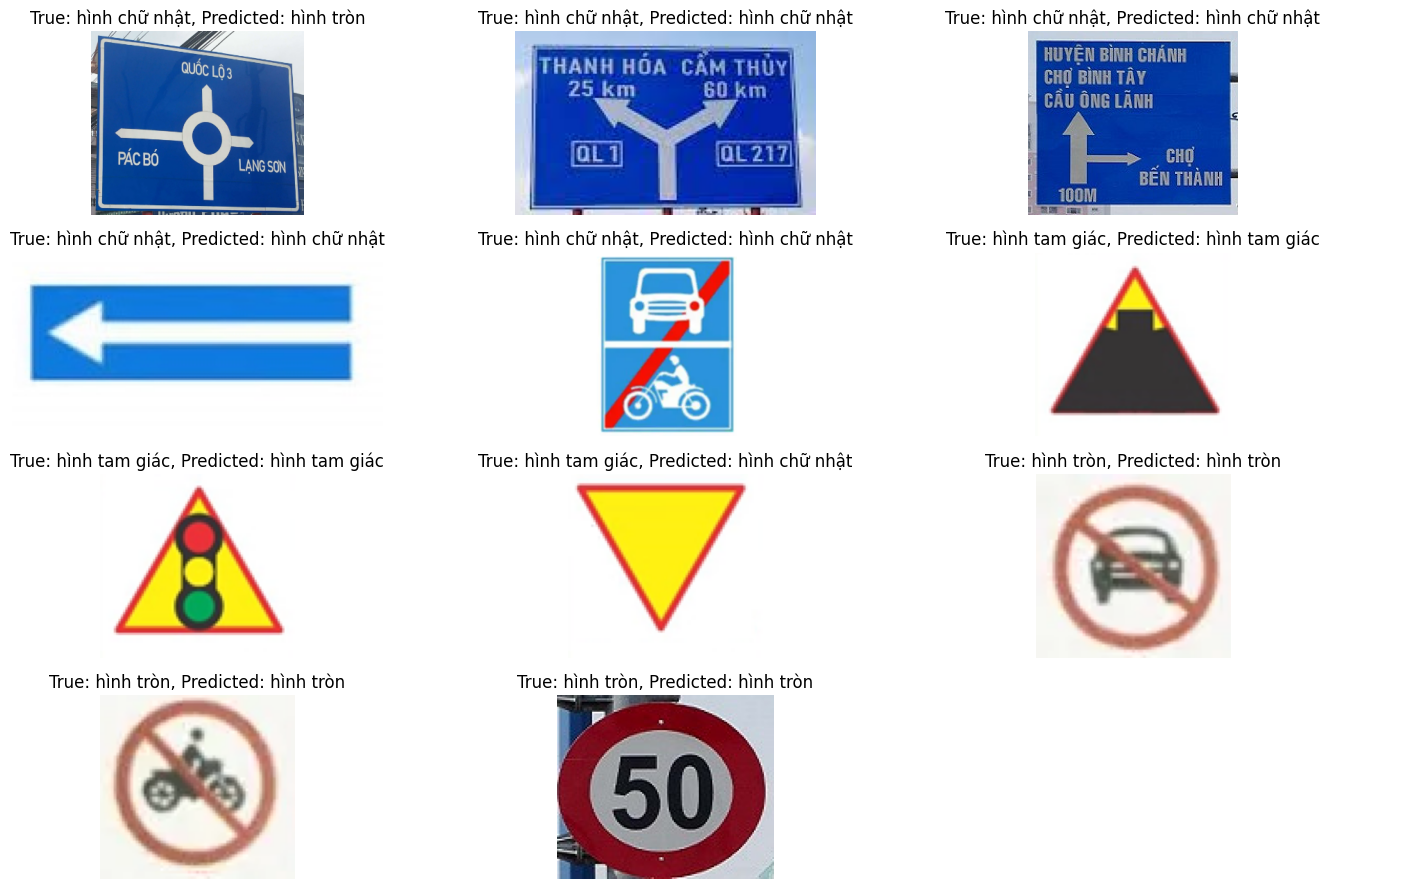

In [284]:
num_images = len(test_images_path)
fig, axes = plt.subplots(4, 3, figsize=(15, 9)) 
axes = axes.ravel()  
for i in range(num_images):
    img = cv2.imread(test_images_path[i])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img_rgb)
    axes[i].axis('off')  
    axes[i].set_title(f'True: {test_labels[i]}, Predicted: {pred[i]}')

for i in range(num_images, len(axes)):
    axes[i].axis('off')

plt.tight_layout() 
plt.show()
